<a href="https://colab.research.google.com/github/jlsm2/deeplearning/blob/main/cc_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento dos dados

### Download de bibliotecas

In [1]:
!pip install d2l==1.0.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

In [2]:
pip install pandas numpy scikit-learn seaborn matplotlib plotly xgboost -q

### Importando bibliotecas

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Carregando o dataset

In [4]:
dfTrain = pd.read_csv("fraudTrain.csv")
dfTest = pd.read_csv("fraudTest.csv")

dfTrain

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


Unnamed: 0 trans_date_trans_time               cc_num  ...  merch_lat  merch_long  is_fraud
0                 0   2019-01-01 00:00:18     2703186189652095  ...  36.011293  -82.048315         0
1                 1   2019-01-01 00:00:44         630423337322  ...  49.159047 -118.186462         0
2                 2   2019-01-01 00:00:51       38859492057661  ...  43.150704 -112.154481         0
3                 3   2019-01-01 00:01:16     3534093764340240  ...  47.034331 -112.561071         0
4                 4   2019-01-01 00:03:06      375534208663984  ...  38.674999  -78.632459         0
...             ...                   ...                  ...  ...        ...         ...       ...
1296670     1296670   2020-06-21 12:12:08       30263540414123  ...  36.841266 -111.690765         0
1296671     1296671   2020-06-21 12:12:19     6011149206456997  ...  38.906881  -78.246528         0
1296672     1296672   2020-06-21 12:12:32     3514865930894695  ...  33.619513 -105.130529         0
1296673     1296673   2020-06-21 12:13:36     2720012583106919  ...  42.788940 -103.241160         0
1296674     1296674   2020-06-21 12:13:37  4292902571056973207  ...  46.565983 -114.186110         0

[1296675 rows x 23 columns]

### Removendo colunas irrelevantes

In [5]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
dfTrain = dfTrain.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])
dfTest = dfTest.drop(columns=["Unnamed: 0", "cc_num", "first", "last", "street", "city", "state", "zip", "dob", "trans_num"])

### Verificando se há valores nulos

In [7]:
print(dfTrain.isnull().sum())
print(dfTest.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
job                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Convertendo colunas de data

In [8]:
# train dataframe
dfTrain["trans_date_trans_time"] = pd.to_datetime(dfTrain["trans_date_trans_time"])

dfTrain["year"] = dfTrain["trans_date_trans_time"].dt.year
dfTrain["month"] = dfTrain["trans_date_trans_time"].dt.month
dfTrain["day"] = dfTrain["trans_date_trans_time"].dt.day
dfTrain["day_of_week"] = dfTrain["trans_date_trans_time"].dt.dayofweek
dfTrain["hour"] = dfTrain["trans_date_trans_time"].dt.hour

dfTrain.drop(columns=["trans_date_trans_time"], inplace=True)

# test dataframe
dfTest["trans_date_trans_time"] = pd.to_datetime(dfTest["trans_date_trans_time"])

dfTest["year"] = dfTest["trans_date_trans_time"].dt.year
dfTest["month"] = dfTest["trans_date_trans_time"].dt.month
dfTest["day"] = dfTest["trans_date_trans_time"].dt.day
dfTest["day_of_week"] = dfTest["trans_date_trans_time"].dt.dayofweek
dfTest["hour"] = dfTest["trans_date_trans_time"].dt.hour

dfTest.drop(columns=["trans_date_trans_time"], inplace=True)


dfTrain

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


merchant       category     amt  ... day  day_of_week  hour
0                 fraud_Rippin, Kub and Mann       misc_net    4.97  ...   1            1     0
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  ...   1            1     0
2                       fraud_Lind-Buckridge  entertainment  220.11  ...   1            1     0
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00  ...   1            1     0
4                        fraud_Keeling-Crist       misc_pos   41.96  ...   1            1     0
...                                      ...            ...     ...  ...  ..          ...   ...
1296670                    fraud_Reichel Inc  entertainment   15.56  ...  21            6    12
1296671             fraud_Abernathy and Sons    food_dining   51.70  ...  21            6    12
1296672                 fraud_Stiedemann Ltd    food_dining  105.93  ...  21            6    12
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90  ...  21            6    12
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30  ...  21            6    12

[1296675 rows x 17 columns]

### Identificando e tratando variáveis categoricas

In [9]:
categorical_cols = dfTrain.select_dtypes(include=["object", "category"]).columns
print(categorical_cols)

Index(['merchant', 'category', 'gender', 'job'], dtype='object')


In [10]:
dfTrain["merchant"] = dfTrain["merchant"].astype("category")
dfTrain["category"] = dfTrain["category"].astype("category")
dfTrain["gender"] = dfTrain["gender"].astype("category")
dfTrain["job"] = dfTrain["job"].astype("category")

dfTest["merchant"] = dfTest["merchant"].astype("category")
dfTest["category"] = dfTest["category"].astype("category")
dfTest["gender"] = dfTest["gender"].astype("category")
dfTest["job"] = dfTest["job"].astype("category")

In [11]:
dfTrain.info()
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   merchant     1296675 non-null  category
 1   category     1296675 non-null  category
 2   amt          1296675 non-null  float64 
 3   gender       1296675 non-null  category
 4   lat          1296675 non-null  float64 
 5   long         1296675 non-null  float64 
 6   city_pop     1296675 non-null  int64   
 7   job          1296675 non-null  category
 8   unix_time    1296675 non-null  int64   
 9   merch_lat    1296675 non-null  float64 
 10  merch_long   1296675 non-null  float64 
 11  is_fraud     1296675 non-null  int64   
 12  year         1296675 non-null  int32   
 13  month        1296675 non-null  int32   
 14  day          1296675 non-null  int32   
 15  day_of_week  1296675 non-null  int32   
 16  hour         1296675 non-null  int32   
dtypes: category(4), float64(5),

In [12]:
# label encoder
le = LabelEncoder()

dfTrain["merchant"] = le.fit_transform(dfTrain["merchant"])
dfTrain["job"] = le.fit_transform(dfTrain["job"])

dfTest["merchant"] = le.fit_transform(dfTest["merchant"])
dfTest["job"] = le.fit_transform(dfTest["job"])

# one-hot encoding
dfTrain = pd.get_dummies(dfTrain, columns=["category", "gender"], drop_first=True)

dfTest = pd.get_dummies(dfTest, columns=["category", "gender"], drop_first=True)

In [13]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   merchant                 1296675 non-null  int64  
 1   amt                      1296675 non-null  float64
 2   lat                      1296675 non-null  float64
 3   long                     1296675 non-null  float64
 4   city_pop                 1296675 non-null  int64  
 5   job                      1296675 non-null  int64  
 6   unix_time                1296675 non-null  int64  
 7   merch_lat                1296675 non-null  float64
 8   merch_long               1296675 non-null  float64
 9   is_fraud                 1296675 non-null  int64  
 10  year                     1296675 non-null  int32  
 11  month                    1296675 non-null  int32  
 12  day                      1296675 non-null  int32  
 13  day_of_week              1296675 non-null 

### Balanceando os casos de fraude

In [14]:
graph = px.histogram(dfTrain, x="is_fraud")

graph.show()

In [15]:
X = dfTrain.drop("is_fraud", axis=1)
y = dfTrain["is_fraud"]

smote = SMOTE(random_state=42)
XTrain_resampled, ytrain_resampled = smote.fit_resample(X, y)

X = dfTest.drop("is_fraud", axis=1)
y = dfTest["is_fraud"]

smote = SMOTE(random_state=42)
XTest_resampled, ytest_resampled = smote.fit_resample(X, y)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e271a4716c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory
Exception ignored on calling ctypes callback function: <function Thread

In [16]:
graph = px.histogram(ytrain_resampled, x="is_fraud")

graph.show()

### Padronizando features numéricas

In [17]:
numeric_features = ["amt", "lat", "long", "city_pop", "unix_time", "year", "month", "day", "day_of_week", "hour"]

scaler = StandardScaler()

XTrain_resampled[numeric_features] = scaler.fit_transform(XTrain_resampled[numeric_features])
XTest_resampled[numeric_features] = scaler.fit_transform(XTest_resampled[numeric_features])

In [18]:
XTrain_resampled

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning:

Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



merchant       amt       lat  ...  category_shopping_pos  category_travel  gender_M
0             514 -0.850969 -0.514053  ...                  False            False     False
1             241 -0.557758  2.075975  ...                  False            False     False
2             390 -0.234096  0.719795  ...                  False            False      True
3             360 -0.736191  1.538679  ...                  False            False      True
4             297 -0.744907 -0.040512  ...                  False            False      True
...           ...       ...       ...  ...                    ...              ...       ...
2578333       288  1.045421 -0.249788  ...                  False            False     False
2578334       195  0.956285 -1.320340  ...                  False            False     False
2578335        53  0.750321 -0.073289  ...                  False            False      True
2578336       400  1.771994  0.422494  ...                  False            False     False
2578337       465  0.939843  0.833129  ...                   True            False      True

[2578338 rows x 28 columns]

In [19]:
XTest_resampled

/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning:

Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



merchant       amt       lat  ...  category_shopping_pos  category_travel  gender_M
0             319 -0.856882 -0.994850  ...                  False            False      True
1             591 -0.779516  0.306099  ...                  False            False     False
2             611 -0.746711  0.378201  ...                  False            False     False
3             222 -0.692887 -2.099555  ...                  False            False      True
4             292 -0.855936  1.111096  ...                  False             True      True
...           ...       ...       ...  ...                    ...              ...       ...
1107143       288  0.908924 -0.082867  ...                  False            False      True
1107144       278  0.811283  2.048689  ...                  False            False      True
1107145       290 -0.787737  0.837390  ...                  False            False      True
1107146       345 -0.392165  0.751609  ...                  False            False      True
1107147       313  1.645889 -0.797521  ...                  False            False      True

[1107148 rows x 28 columns]

### Identificando e tratando outliers


In [20]:
# train

# identificação dos outliers
Q1 = XTrain_resampled["amt"].quantile(0.25)
Q3 = XTrain_resampled["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = XTrain_resampled[(XTrain_resampled["amt"] < lower_bound) | (XTrain_resampled["amt"] > upper_bound)]

# remoção
XTrain_resampled_cleaned = XTrain_resampled[(XTrain_resampled["amt"] >= lower_bound) & (XTrain_resampled["amt"] <= upper_bound)]

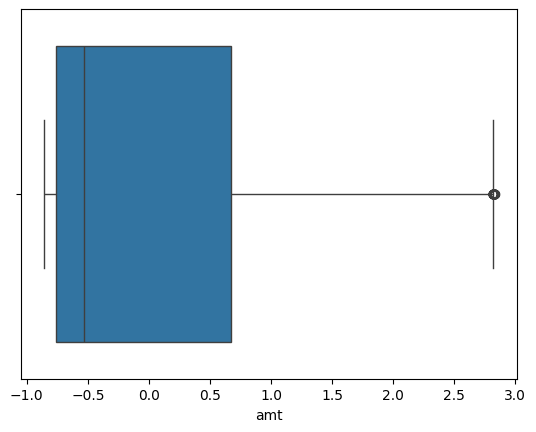

In [21]:
sns.boxplot(x=XTrain_resampled_cleaned["amt"])
plt.show()

In [22]:
# test

# identificação dos outliers
Q1 = XTest_resampled["amt"].quantile(0.25)
Q3 = XTest_resampled["amt"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = XTest_resampled[(XTest_resampled["amt"] < lower_bound) | (XTest_resampled["amt"] > upper_bound)]

# remoção
XTest_resampled_cleaned = XTest_resampled[(XTest_resampled["amt"] >= lower_bound) & (XTest_resampled["amt"] <= upper_bound)]

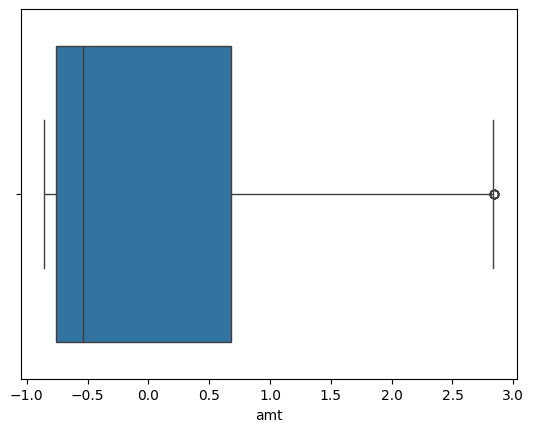

In [23]:
sns.boxplot(x=XTest_resampled_cleaned["amt"])
plt.show()

### Divisão dos dados

In [24]:
X_train = XTrain_resampled
y_train = ytrain_resampled

X_test = XTest_resampled
y_test = ytest_resampled

In [25]:
for column in X_train.columns:
  if X_train[column].dtype == "bool":
    X_train[column] = X_train[column].astype(int)

for column in X_test.columns:
  if X_test[column].dtype == "bool":
    X_test[column] = X_test[column].astype(int)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

X_train.info()
X_test.info()
y_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2578338 entries, 0 to 2578337
Data columns (total 28 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   merchant                 int64  
 1   amt                      float64
 2   lat                      float64
 3   long                     float64
 4   city_pop                 float64
 5   job                      int64  
 6   unix_time                float64
 7   merch_lat                float64
 8   merch_long               float64
 9   year                     float64
 10  month                    float64
 11  day                      float64
 12  day_of_week              float64
 13  hour                     float64
 14  category_food_dining     int64  
 15  category_gas_transport   int64  
 16  category_grocery_net     int64  
 17  category_grocery_pos     int64  
 18  category_health_fitness  int64  
 19  category_home            int64  
 20  category_kids_pets       int64  
 21  category

# Criação e treinamento dos modelos

### MLP

In [37]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [38]:
# criando o modelo
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

In [39]:
# ajustando parametros
input_size = X_train.shape[1]
model = MLP(input_size)

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
# treinamento
def calculate_metrics(outputs, labels):
    predicted = (outputs > 0.5).float()
    accuracy = accuracy_score(labels.cpu(), predicted.cpu())
    precision = precision_score(labels.cpu(), predicted.cpu())
    recall = recall_score(labels.cpu(), predicted.cpu())
    f1 = f1_score(labels.cpu(), predicted.cpu())
    return accuracy, precision, recall, f1

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)

        labels = labels.view(-1, 1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)

    model.eval()
    all_outputs = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            all_outputs.append(outputs)
            all_labels.append(labels)

    # concatena todas as saídas e rótulos
    all_outputs = torch.cat(all_outputs)
    all_labels = torch.cat(all_labels)

    all_labels = all_labels.view(-1, 1)

    accuracy, precision, recall, f1 = calculate_metrics(all_outputs, all_labels)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}, '
          f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


Epoch [1/10], Loss: 0.1010, Accuracy: 0.9746, Precision: 0.9933, Recall: 0.9556, F1 Score: 0.9741
Epoch [2/10], Loss: 0.0597, Accuracy: 0.9820, Precision: 0.9944, Recall: 0.9695, F1 Score: 0.9818
Epoch [3/10], Loss: 0.0506, Accuracy: 0.9840, Precision: 0.9895, Recall: 0.9784, F1 Score: 0.9839
Epoch [4/10], Loss: 0.0471, Accuracy: 0.9829, Precision: 0.9929, Recall: 0.9727, F1 Score: 0.9827
Epoch [5/10], Loss: 0.0446, Accuracy: 0.9844, Precision: 0.9935, Recall: 0.9751, F1 Score: 0.9842
Epoch [6/10], Loss: 0.0426, Accuracy: 0.9852, Precision: 0.9928, Recall: 0.9775, F1 Score: 0.9851
Epoch [7/10], Loss: 0.0414, Accuracy: 0.9842, Precision: 0.9941, Recall: 0.9742, F1 Score: 0.9840
Epoch [8/10], Loss: 0.0405, Accuracy: 0.9814, Precision: 0.9944, Recall: 0.9682, F1 Score: 0.9811
Epoch [9/10], Loss: 0.0394, Accuracy: 0.9858, Precision: 0.9923, Recall: 0.9793, F1 Score: 0.9857
Epoch [10/10], Loss: 0.0390, Accuracy: 0.9847, Precision: 0.9912, Recall: 0.9782, F1 Score: 0.9846


### LSTM

In [43]:
# redimensionando os dados
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [44]:
# criando o modelo
class LSTM(nn.Module):
    def __init__(self, input_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, 64, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return self.sigmoid(out)

input_size = X_train.shape[2]
model = LSTM(input_size)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:88: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1



In [46]:
# treinamento
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def calculate_accuracy(outputs, labels):
    predicted = (outputs > 0.5).float()
    correct = (predicted == labels).float()
    return correct.sum() / len(correct)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    all_labels = []
    all_preds = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_accuracy += calculate_accuracy(outputs, labels).item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend((outputs > 0.5).cpu().numpy())

    avg_loss = running_loss / len(train_loader)
    avg_accuracy = running_accuracy / len(train_loader)

    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch [1/10], Loss: 0.1047, Accuracy: 0.9671, Precision: 0.9736, Recall: 0.9602, F1 Score: 0.9668
Epoch [2/10], Loss: 0.0689, Accuracy: 0.9781, Precision: 0.9857, Recall: 0.9704, F1 Score: 0.9780
Epoch [3/10], Loss: 0.0634, Accuracy: 0.9796, Precision: 0.9870, Recall: 0.9720, F1 Score: 0.9795
Epoch [4/10], Loss: 0.0597, Accuracy: 0.9808, Precision: 0.9879, Recall: 0.9735, F1 Score: 0.9807
Epoch [5/10], Loss: 0.0572, Accuracy: 0.9816, Precision: 0.9883, Recall: 0.9747, F1 Score: 0.9815
Epoch [6/10], Loss: 0.0545, Accuracy: 0.9825, Precision: 0.9885, Recall: 0.9763, F1 Score: 0.9823
Epoch [7/10], Loss: 0.0523, Accuracy: 0.9834, Precision: 0.9888, Recall: 0.9780, F1 Score: 0.9833
Epoch [8/10], Loss: 0.0516, Accuracy: 0.9838, Precision: 0.9888, Recall: 0.9786, F1 Score: 0.9837
Epoch [9/10], Loss: 0.0501, Accuracy: 0.9844, Precision: 0.9891, Recall: 0.9795, F1 Score: 0.9843
Epoch [10/10], Loss: 0.0493, Accuracy: 0.9846, Precision: 0.9893, Recall: 0.9798, F1 Score: 0.9845
